<a href="https://colab.research.google.com/github/nahbos/AUT-Fundamental-Statistical-Learning/blob/main/HW01/ex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sobhan Moradian Daghigh

- 11-22-2022

### Ex-*01*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from matplotlib_venn import venn3, venn3_circles
from scipy.stats import norm, cauchy

In [2]:
def plotter(data):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(10, 5))
        plt.plot(data)
        plt.show()

# Q1

In [3]:
def coin_flip_simulator(p, n=1000):
    proportion = []
    for i in range(1, n + 1):
        proportion.append(np.random.binomial(n=i, p=p) / i)
    return proportion

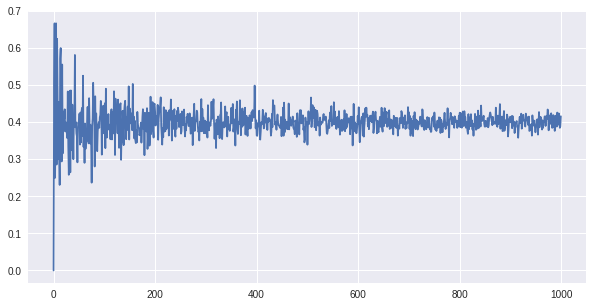

In [4]:
p = 0.4
n = 1000
proportions = coin_flip_simulator(p=p, n=n)
plotter(proportions)

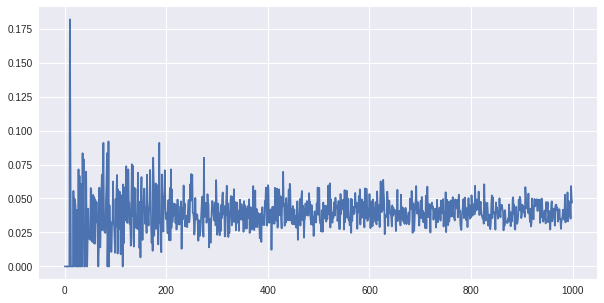

In [5]:
p = 0.04
n = 1000
proportions2 = coin_flip_simulator(p=p, n=n)
plotter(proportions2)

# Q2

In [6]:
def heads_estimator(p, n):
    return np.average(np.random.binomial(n=n, p=p, size=10000))

In [7]:
p = 0.4
estimations = []
for n in [10, 100, 1000]:
    estimations.append(heads_estimator(p=p, n=n))
print('X for n = 10   : {:.2f}'.format(estimations[0]))
print('X for n = 100  : {:.2f}'.format(estimations[1]))
print('X for n = 1000 : {:.2f}'.format(estimations[2]))

X for n = 10   : 3.98
X for n = 100  : 39.97
X for n = 1000 : 400.04


# Q3

In [8]:
A = [2, 3, 6]
B = [1, 2, 3, 4]
epoch = 1000

In [9]:
def rolling_dice(number):
    counts = [0] * 6
    for i in range(number):
        roll = random.randint(1, 6)
        counts[roll - 1] += 1
    return counts

In [10]:
def check_events(event, A, B, epoch):
    AB = np.intersect1d(A, B)
    temp_a = 0
    temp_b = 0
    temp_ab = 0
    for i, ele in enumerate(event):
        if (i + 1) in A:
            temp_a += ele
        if (i + 1) in B:
            temp_b += ele
        if (i + 1) in AB:
            temp_ab += ele
    return np.divide([temp_a, temp_b, temp_ab], epoch)

In [11]:
def venn_drwer(A, B):
    plt.figure(figsize=(10, 5))
    A = set(A)
    B = set(B)
    C = set([])
    v = venn3(subsets = [A, B, C], set_labels = ('A', 'B'))
    v.get_label_by_id('100').set_text('\n\n'.join(map(str,A-B)))
    if A&B:
        v.get_label_by_id('110').set_text('\n\n'.join(map(str,A&B)))
    v.get_label_by_id('010').set_text('\n\n'.join(map(str,B-A)))
    venn3_circles(subsets = [A, B, C], linestyle='dashed', linewidth=2, color='k')
    plt.show()

In [12]:
event = rolling_dice(epoch)
event

[168, 190, 170, 159, 144, 169]

In [13]:
p_a, p_b, p_ab = check_events(event, A, B, epoch)
print('P(A)  = {} |'.format(p_a))
print('P(B)  = {} |   >  P(A) * P(B) = {:.3f}'.format(p_b, p_a * p_b))
print('P(AB) = {}'.format(p_ab))

P(A)  = 0.529 |
P(B)  = 0.687 |   >  P(A) * P(B) = 0.363
P(AB) = 0.36


/usr/local/lib/python3.7/dist-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


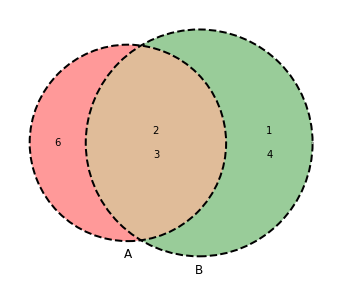

In [14]:
venn_drwer(A, B)

In [15]:
disj_A = [1, 2, 3]
disj_B = [4, 5, 6]
event = rolling_dice(epoch)
p_a, p_b, p_ab = check_events(event, disj_A, disj_B, epoch)
print('P(A)  = {} |'.format(p_a))
print('P(B)  = {} |   >  P(A) * P(B) = {:.3f}'.format(p_b, p_a * p_b))
print('P(AB) = {}'.format(p_ab))

P(A)  = 0.497 |
P(B)  = 0.503 |   >  P(A) * P(B) = 0.250
P(AB) = 0.0


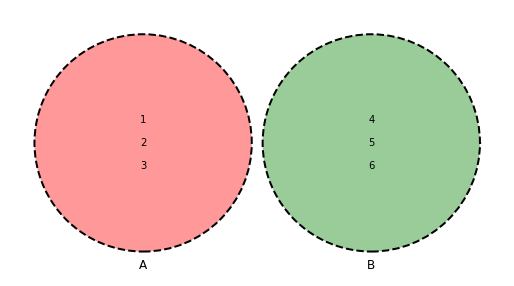

In [16]:
venn_drwer(disj_A, disj_B)

# Q4

In [17]:
def monty_hall_decision(change_door=True):
  
    doors = ['goat', 'car', 'goat']
    np.random.shuffle(doors)
    
    choice1 = random.randint(0, 2)
    
    options = list(set([0, 1, 2]) - set([choice1]))
    options_to_show = []
    for i in options:
        if doors[i] == 'goat':
            options_to_show.append(i)

    show = options_to_show[random.randint(0, len(options_to_show) - 1)]

    opt = list(set([0, 1, 2]) - set([choice1, show]))[0]
    if change_door:
        return 1 if doors[opt] == 'car' else 0
    else: 
        return 1 if doors[choice1] == 'car' else 0

In [18]:
# Condition 1: 1000 rounds with changing decision
condition1 = sum([monty_hall_decision(change_door=True) for _ in range(1000)])

# Condition 2: 1000 rounds without changing decision
condition2 = sum([monty_hall_decision(change_door=False) for _ in range(1000)])

print('Condition one probability: {}'.format(condition1 / 1000))
print('Condition two probability: {}'.format(condition2 / 1000))

Condition one probability: 0.659
Condition two probability: 0.336


# Q5

In [5]:
def drawer(x, condition, mean, sigma):
    plt.figure(figsize=(10, 5))
    with plt.style.context('seaborn'):
        y = norm.pdf(x, mean, sigma)
        z = x[condition]
        plt.plot(x, y)
        plt.fill_between(z, 0, norm.pdf(z, mean, sigma))
        plt.show()

In [6]:
def cdf_prob(mean, sigma, x, operator='greater'):
    p = 1 - norm.cdf(x, mean, sigma) if operator == 'greater' else norm.cdf(x, mean, sigma)
    return round(p, 3)

In [7]:
mean = 5
sigma = np.sqrt(18)

## a.

In [22]:
cdf_prob(mean=mean, sigma=sigma, x=9, operator='less')

0.827

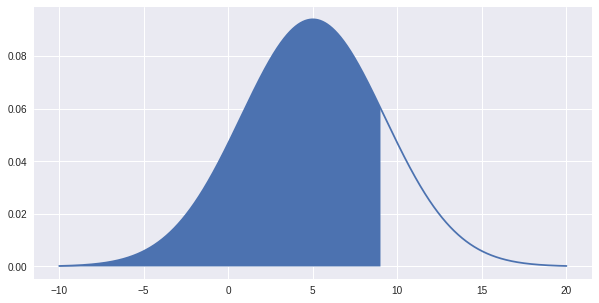

In [11]:
x = np.arange(-10, 20, 0.001)
drawer(x=x, condition=x<9, mean=mean, sigma=sigma)

## b.

In [24]:
cdf_prob(mean=mean, sigma=sigma, x=-3, operator='greater')

0.97

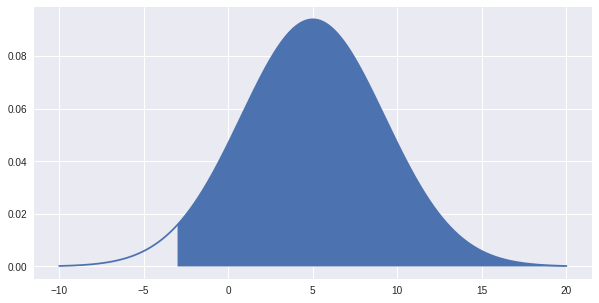

In [25]:
drawer(x=x, condition=x>-3, mean=mean, sigma=sigma)

## c.

In [8]:
def inverse_cdf_iterator(mean, sigma, p, operator='greater'):
    if operator == 'greater':
        x = norm.ppf(1 - p, loc=mean, scale=sigma)
    else:
        x = norm.ppf(p, loc=mean, scale=sigma)
    return round(x, 3)

In [9]:
inverse_cdf_iterator(mean=mean, sigma=sigma, p=0.05, operator='greater')

11.979

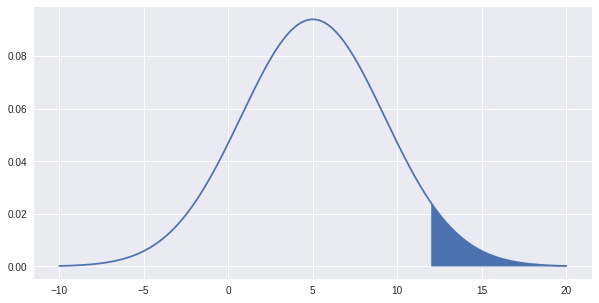

In [12]:
drawer(x=x, condition=x>12, mean=mean, sigma=sigma)

## d.

In [28]:
# P(X < 0)
p1 = cdf_prob(mean=mean, sigma=sigma, x=0, operator='less')

# P(X < 4)
p2 = cdf_prob(mean=mean, sigma=sigma, x=4, operator='less')

np.abs(round(p2 - p1, 3))

0.288

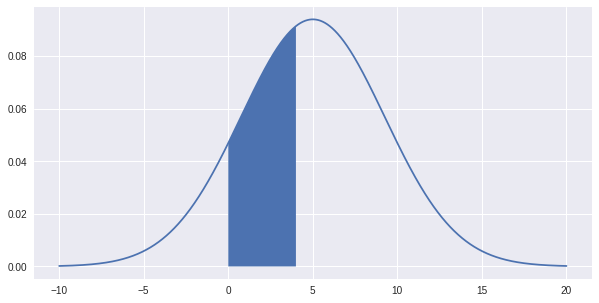

In [29]:
drawer(x=x, condition=(x>0) & (x<4), mean=mean, sigma=sigma)

## e.

In [30]:
x = inverse_cdf_iterator(mean=mean, sigma=sigma, p=0.975, operator='less')
round(x, 3)

13.315

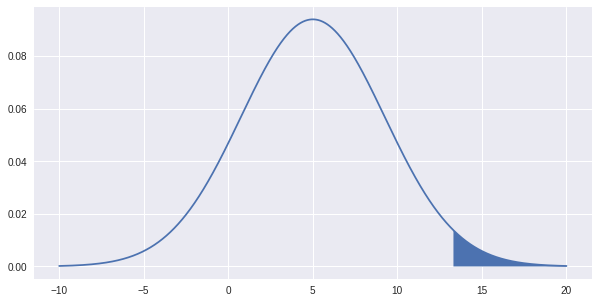

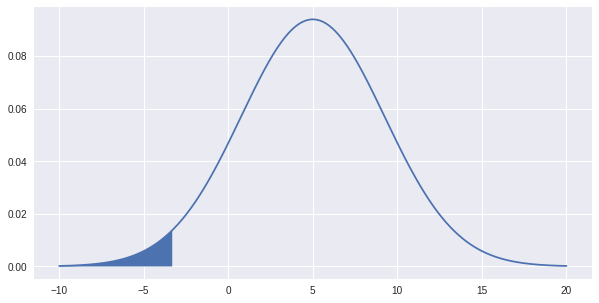

In [15]:
drawer(x=x, condition=x>13.315, mean=mean, sigma=sigma)
drawer(x=x, condition=x<-3.315, mean=mean, sigma=sigma)

# Q6

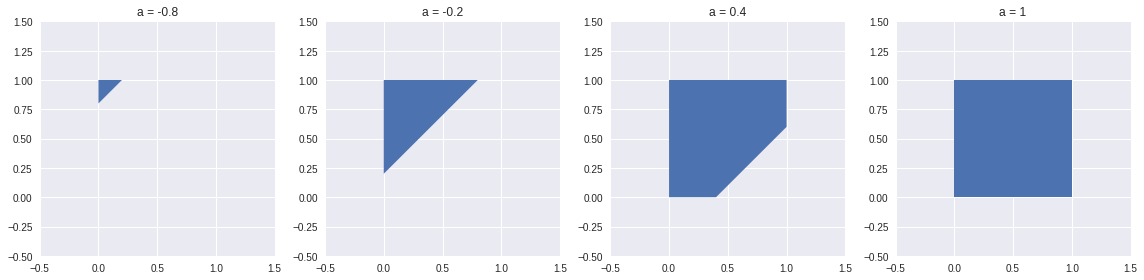

In [31]:
plt.figure(figsize=(16, 4))
with plt.style.context('seaborn'):
    ax = plt.subplot(1, 4, 1)
    a = -0.8
    x = [0, 1+a, 0]
    y = [1, 1, -a]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = -0.8')

    ax = plt.subplot(1, 4, 2)
    a = -0.2
    x = [0, 1 + a, 0]
    y = [1, 1, -a]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = -0.2')

    ax = plt.subplot(1, 4, 3)
    a = 0.4
    x = [0, a, 1, 1, 0]
    y = [0, 0, 1 - a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 0.4')

    ax = plt.subplot(1, 4, 4)
    a = 1
    x = [0, a, 1, 1, 0]
    y = [0, 0, 1 - a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 1')


    plt.tight_layout()
    plt.show()

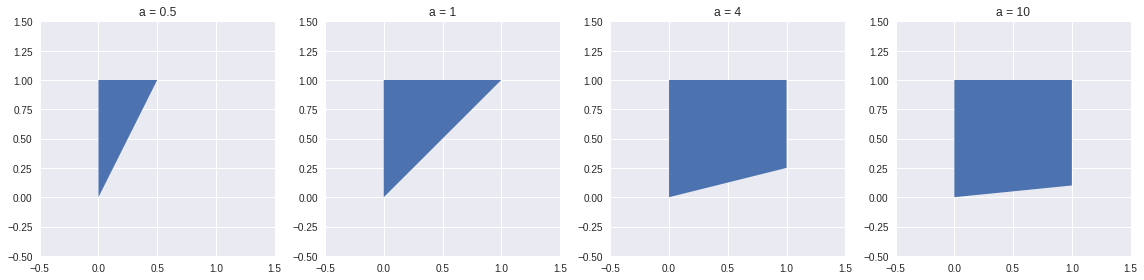

In [32]:
plt.figure(figsize=(16, 4))
with plt.style.context('seaborn'):
    ax = plt.subplot(1, 4, 1)
    a = 0.5
    x = [0, a, 0]
    y = [0, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 0.5')

    ax = plt.subplot(1, 4, 2)
    a = 1
    x = [0, a, 0]
    y = [0, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 1')

    ax = plt.subplot(1, 4, 3)
    a = 4
    x = [0, 1, 1, 0]
    y = [0, 1/a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 4')

    ax = plt.subplot(1, 4, 4)
    a = 10
    x = [0, 1, 1, 0]
    y = [0, 1/a, 1, 1]
    ax.fill(x, y)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title('a = 10')


    plt.tight_layout()
    plt.show()

# Q7

In [33]:
def generator(mean, covariance, n=1000):
    return np.random.multivariate_normal(mean, covariance, n).T

In [34]:
x1, x2 = generator(mean=[0, 0], covariance=[[1, 1/2], [1/2, 1/3]])

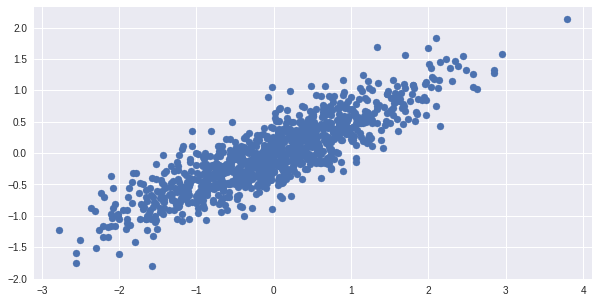

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 5))
    plt.scatter(x1, x2)
    plt.show()

In [36]:
x1.mean(), x2.mean()

(-0.029114723040381926, -0.01698800201382161)

In [37]:
np.cov(x1, x2)

array([[0.98304337, 0.48509314],
       [0.48509314, 0.32279235]])

In [16]:
def dart_plotter(x1, x2):
    plt.figure(figsize=(5, 5))
    with plt.style.context('seaborn'):

        theta = np.linspace(0, 2 * np.pi, 150)
        radius1 = 0.3
        radius2 = 0.2
        radius3 = 0.1
        
        a1 = radius1 * np.cos(theta)
        b1 = radius1 * np.sin(theta)

        a2 = radius2 * np.cos(theta)
        b2 = radius2 * np.sin(theta)

        a3 = radius3 * np.cos(theta)
        b3 = radius3 * np.sin(theta)

        plt.scatter(x1.mean(), x2.mean())
        plt.plot(a1, b1)
        plt.plot(a2, b2)
        plt.plot(a3, b3)
        
        plt.show()

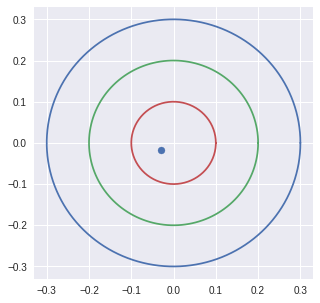

In [39]:
dart_plotter(x1, x2)

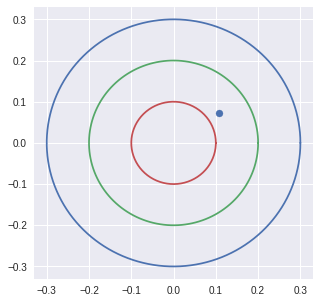

In [40]:
x1, x2 = generator(mean=[0, 0], covariance=[[1, 1/2], [1/2, 1/3]], n=100)
dart_plotter(x1, x2)

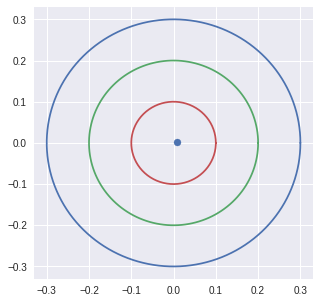

In [41]:
x1, x2 = generator(mean=[0, 0], covariance=[[1, 1/2], [1/2, 1/3]], n=10000)
dart_plotter(x1, x2)

# Q8

In [17]:
N = 1000
x = np.random.normal(0, 1, N)
y = np.random.normal(0, 1, N)
average = np.mean(np.sqrt(np.power(x, 2) + np.power(y, 2)))
print('Average distance ', round(average, 3))

Average distance  1.244


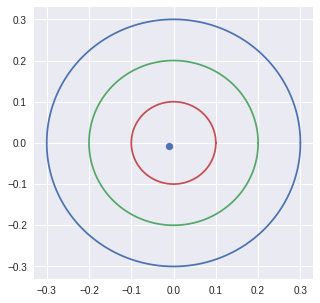

In [18]:
dart_plotter(x, y)

# Q9

In [20]:
def binomial(n, p, size=10000):
    return [np.random.binomial(n=1000, p=0.3) for _ in range(size)]

In [21]:
X1 = binomial(n=1000, p=0.3)
X2 = binomial(n=1000, p=0.5)
X3 = binomial(n=2000, p=0.5)

In [22]:
X4 = X1 + X2
X5 = X2 + X3

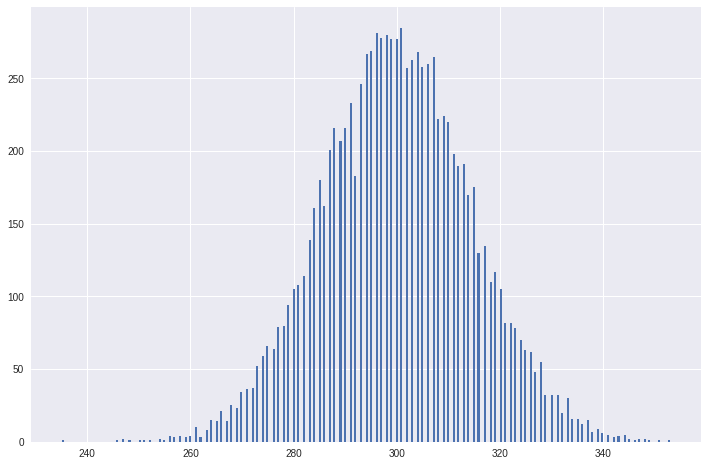

In [23]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X1, bins=300, linewidth=2)
    plt.show()

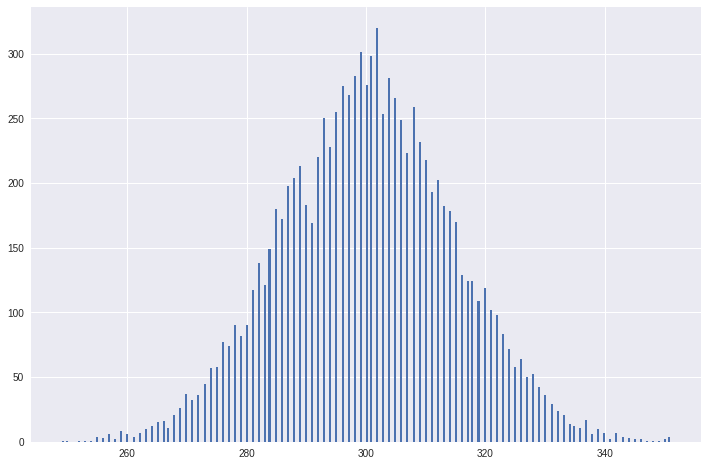

In [24]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X2, bins=300, linewidth=2)
    plt.show()

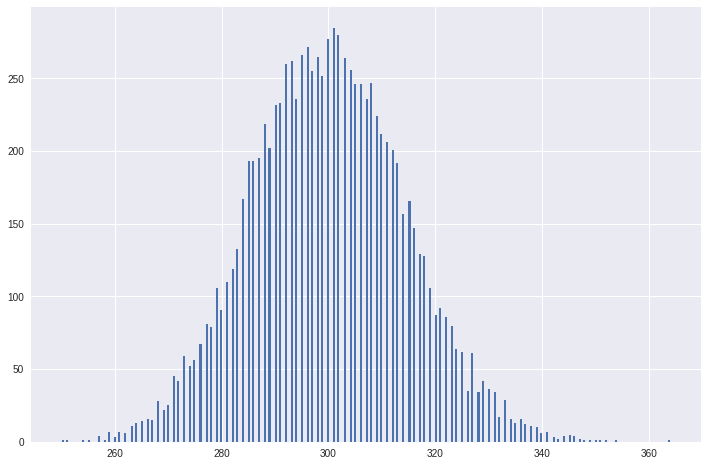

In [25]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X3, bins=300, linewidth=2)
    plt.show()

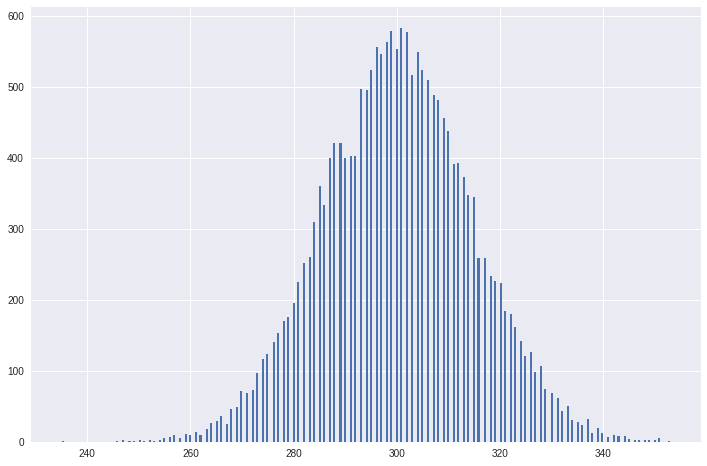

In [26]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X4, bins=300, linewidth=2)
    plt.show()

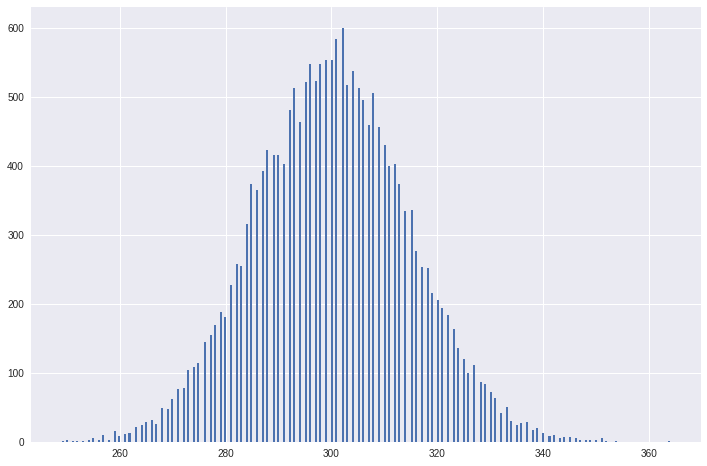

In [27]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X5, bins=300, linewidth=2)
    plt.show()

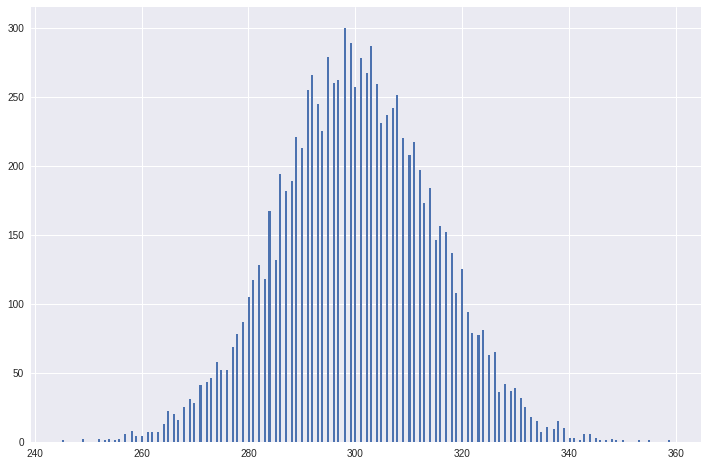

In [29]:
X4_check = binomial(n=2000, p=0.4)
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.hist(X4_check, bins=300, linewidth=2)
    plt.show()

# Q10

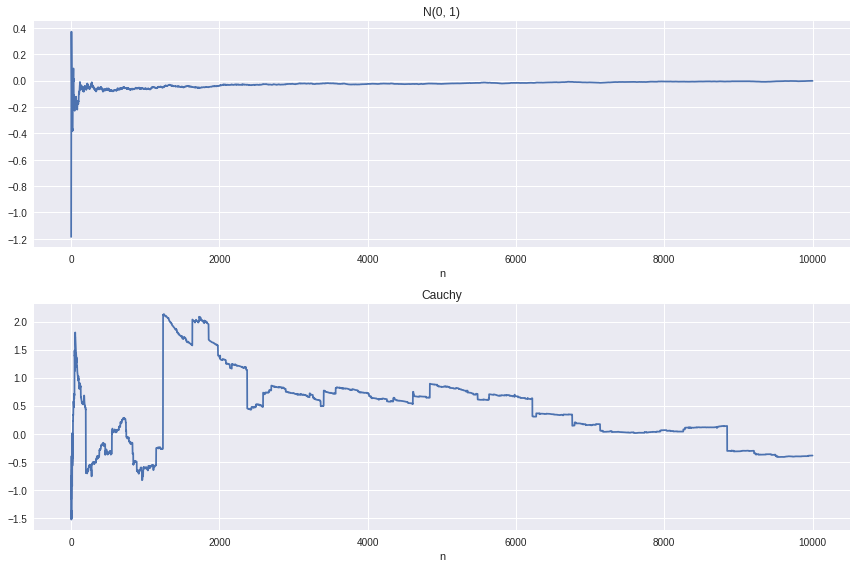

In [70]:
N = 10000
X = norm.rvs(size=N)
Y = cauchy.rvs(size=N)

nn = np.arange(1, N + 1)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    ax = plt.subplot(2, 1, 1)
    ax.plot(nn, np.cumsum(X) / nn)
    ax.set_title('N(0, 1)')
    ax.set_xlabel('n')

    ax = plt.subplot(2, 1, 2)
    ax.plot(nn, np.cumsum(Y) / nn)
    ax.set_title('Cauchy')
    ax.set_xlabel('n')

    plt.tight_layout()
    plt.show()

# Q11

In [52]:
i_vals = [1, 100, 1000, 10000, 30000, 60000, 100000, 150000, 200000, 300000, 500000]
eps = 0.00001
samples = 50000

i = 1       | and P(|Xn - mu| > epsilon) = 0.501
i = 100     | and P(|Xn - mu| > epsilon) = 0.504
i = 1000    | and P(|Xn - mu| > epsilon) = 0.494
i = 10000   | and P(|Xn - mu| > epsilon) = 0.463
i = 30000   | and P(|Xn - mu| > epsilon) = 0.382
i = 60000   | and P(|Xn - mu| > epsilon) = 0.276
i = 100000  | and P(|Xn - mu| > epsilon) = 0.157
i = 150000  | and P(|Xn - mu| > epsilon) = 0.067
i = 200000  | and P(|Xn - mu| > epsilon) = 0.023
i = 300000  | and P(|Xn - mu| > epsilon) = 0.001
i = 500000  | and P(|Xn - mu| > epsilon) = 0.000



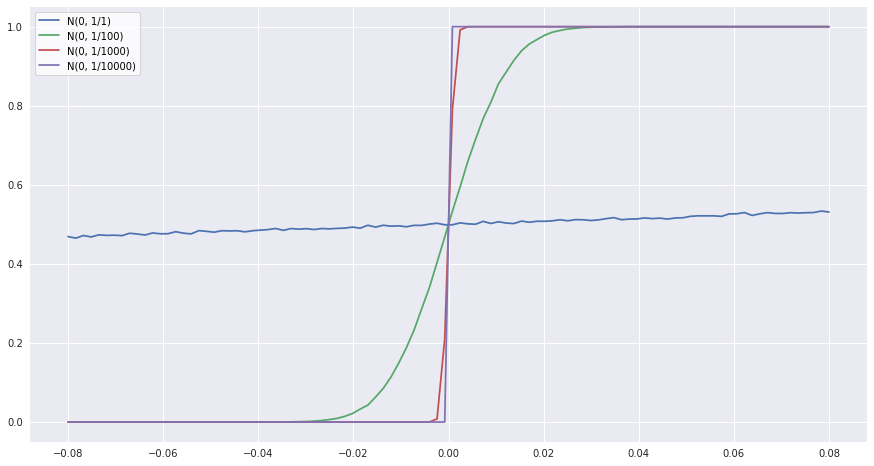

In [53]:
convergence_in_probs = []
xs = np.linspace(-0.08, 0.08, 100)

plt.figure(figsize=(15, 8))
with plt.style.context('seaborn'):
    for i in i_vals:
        probs = []
        for x in xs:
            X = np.random.normal(0, 1/i, samples)
            probs.append(np.sum(X < x) / samples)
        if i <= 10000:
            plt.plot(xs, probs, label = f'N(0, 1/{i})')
        temp = np.sum(X - 0 > eps) / samples
        print('i = {:<7} | and P(|Xn - mu| > epsilon) = {:.3f}'.format(i, temp))
        convergence_in_probs.append(temp)
print()
plt.legend()
plt.show()

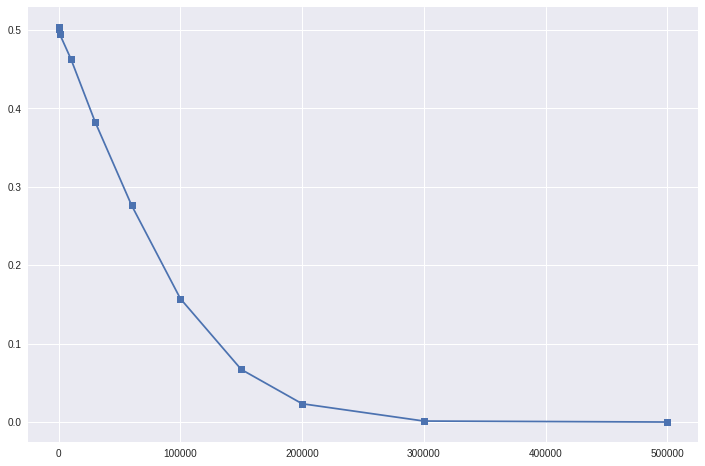

In [54]:
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(i_vals, convergence_in_probs, '-s')
    plt.show()

# Q12

## a.

In [46]:
n_samples = 1000
n = 100
eps = 0.2
p = 0.3

In [47]:
errors = []
X = np.random.binomial(n=1, p=p, size=n_samples)
_range = range(100, n_samples + 1, 100)

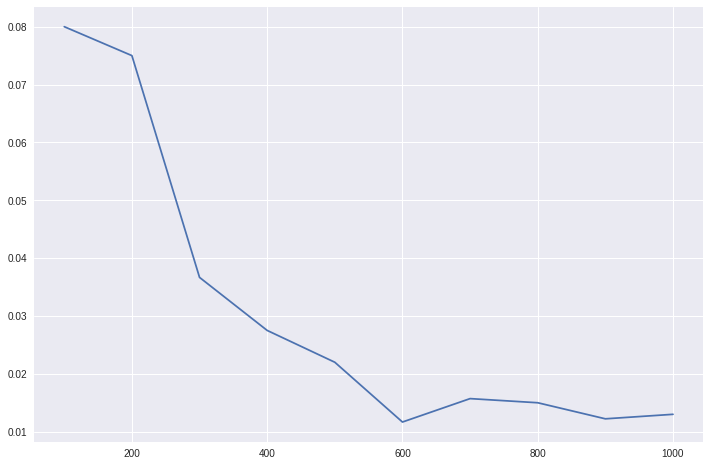

In [48]:
for cnt in _range:
    X_samples = X[:cnt]
    X_mean = np.mean(X_samples)
    error = np.abs(X_mean - p)
    errors.append(error)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(_range, errors)
    plt.show()

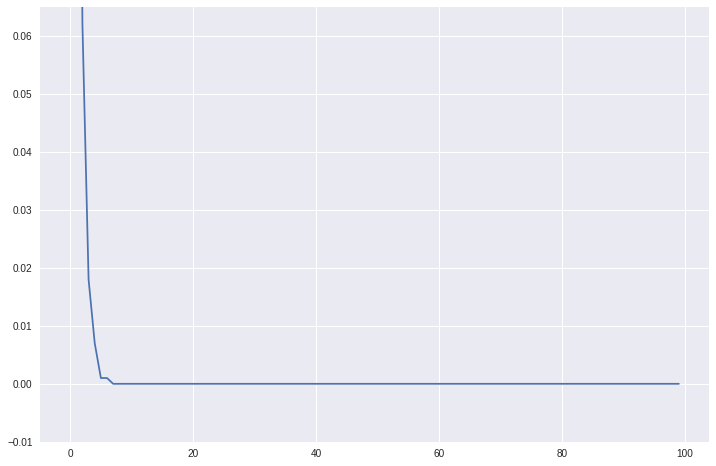

In [49]:
n_samples = 1000
n = 100
eps = 0.2
p = 0.3
iterations = 1000
Xs = [np.random.binomial(n=1, p=p, size=n_samples) for _ in range(iterations)]
_range = range(1, n_samples + 1, 10)
probs = []

for cnt in _range:
    prob = 0
    for iter in Xs:
        X_samples = iter[:cnt]
        X_mean = np.mean(X_samples)
        error = np.abs(X_mean - p)
        prob += int(error > eps)
    probs.append(prob / iterations)
    
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(range(len(probs)), probs)
    plt.ylim(-0.01, 0.065)
    plt.show()

In [77]:
n_samples = 1000
n = 100
eps = 0.2
p = 0.3

In [78]:
errors = []
X = np.random.binomial(n=1, p=p, size=n_samples)
_range = range(100, n_samples + 1, 100)

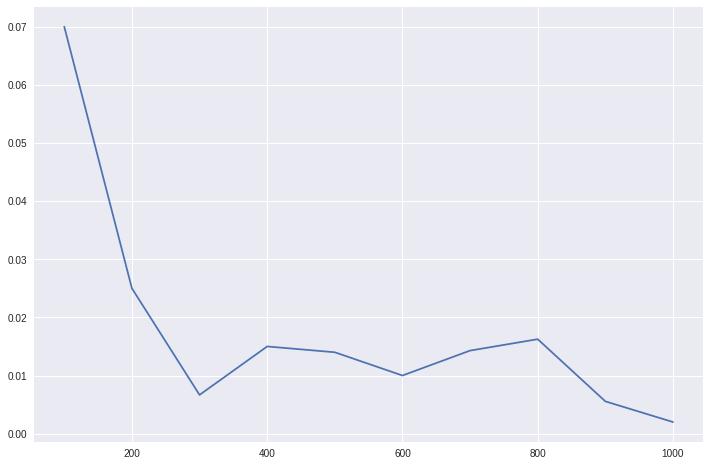

In [79]:
for cnt in _range:
    X_samples = X[:cnt]
    X_mean = np.mean(X_samples)
    error = np.abs(X_mean - p)
    errors.append(error)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(_range, errors)
    plt.show()

## b.

In [80]:
n_samples = 1000
n = 100
eps = 0.2
p = 0.5
errors = []

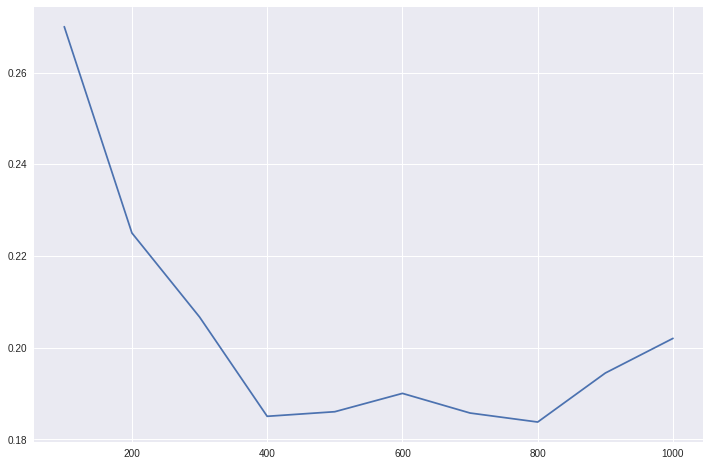

In [81]:
for cnt in _range:
    X_samples = X[:cnt]
    X_mean = np.mean(X_samples)
    error = np.abs(X_mean - p)
    errors.append(error)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(_range, errors)
    plt.show()

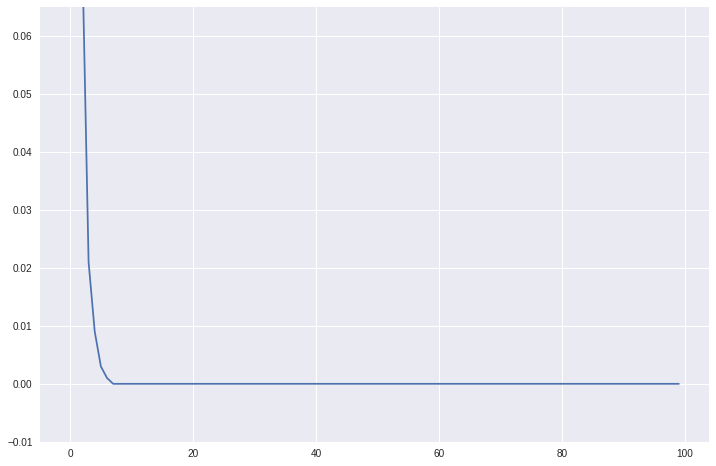

In [82]:
n_samples = 1000
n = 100
eps = 0.2
p = 0.5
iterations = 1000
Xs = [np.random.binomial(n=1, p=p, size=n_samples) for _ in range(iterations)]
_range = range(1, n_samples + 1, 10)
probs = []

for cnt in _range:
    prob = 0
    for iter in Xs:
        X_samples = iter[:cnt]
        X_mean = np.mean(X_samples)
        error = np.abs(X_mean - p)
        prob += int(error > eps)
    probs.append(prob / iterations)
    
plt.figure(figsize=(12, 8))
with plt.style.context('seaborn'):
    plt.plot(range(len(probs)), probs)
    plt.ylim(-0.01, 0.065)
    plt.show()

Finito